
# Ejercicio de Manifold Learning: Proyecto Aceite de Oliva

### Aprendizaje máquina II (Curso 2023-2024)


### Nombre y apellidos: Samuel Ortega & Pablo Vicente

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from umap import UMAP
import pandas as pd
import plotly.express as px
from skdim.id import lPCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)
from sklearn.model_selection import train_test_split

### 1.- Carga de datos.

Carga el conjunto de datos **olive.csv**. Este conjunto de datos clasifica diferentes tipos de aceites de oliva italianos en regiones (3 grupos) y áreas (9 grupos) en función de su composición. Separa el conjunto de datos en *X*, *y3* y *y9*.

In [2]:
# Cargar el conjunto de datos
olive_df = pd.read_csv('olive.csv')

# Separar características (X)
X = olive_df.drop(columns=['class', 'Area', 'Region'])

# Separar etiquetas de regiones (y3)
y3 = olive_df['Region']

# Separar etiquetas de áreas (y9)
y9 = olive_df['Area']

# Verificar las dimensiones de los conjuntos de datos
print("Dimensiones de X:", X.shape)
print("Dimensiones de y3:", y3.shape)
print("Dimensiones de y9:", y9.shape)


Dimensiones de X: (572, 8)
Dimensiones de y3: (572,)
Dimensiones de y9: (572,)


In [3]:
X

,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,952,49,254,7795,780,50,75,41
1,1036,59,235,7868,661,30,62,44
2,1075,75,226,7823,672,36,60,29
3,995,46,288,7806,679,56,86,40
4,1155,98,201,7606,816,32,60,29
...,...,...,...,...,...,...,...,...
567,1110,80,215,7910,525,50,60,1
568,1100,80,215,7930,535,45,60,2
569,1105,55,205,7965,600,25,20,2
570,1110,50,220,7950,600,52,10,2


### 2.- Visualización de los datos.

- Utilizando los algoritmos t-SNE y UMAP vistos en clase, realiza una visualización de los datos en 2D y en 3D (utiliza la librería plotly para la representación 3D) coloreando los puntos con `labels3` y `labels9`. En UMAP, utiliza la versión no supervisada.
- Varía los parámetros de perplexity y n_neighbors según consideres y comenta qué valores has escogido y porqué.
- Comenta los gráficos y compara los resultados en función del valor de KL obtenido (en t-SNE). 


Comprobamos, para distintos valores de perplexity, qué representación agrupa mejor nuestros datos.

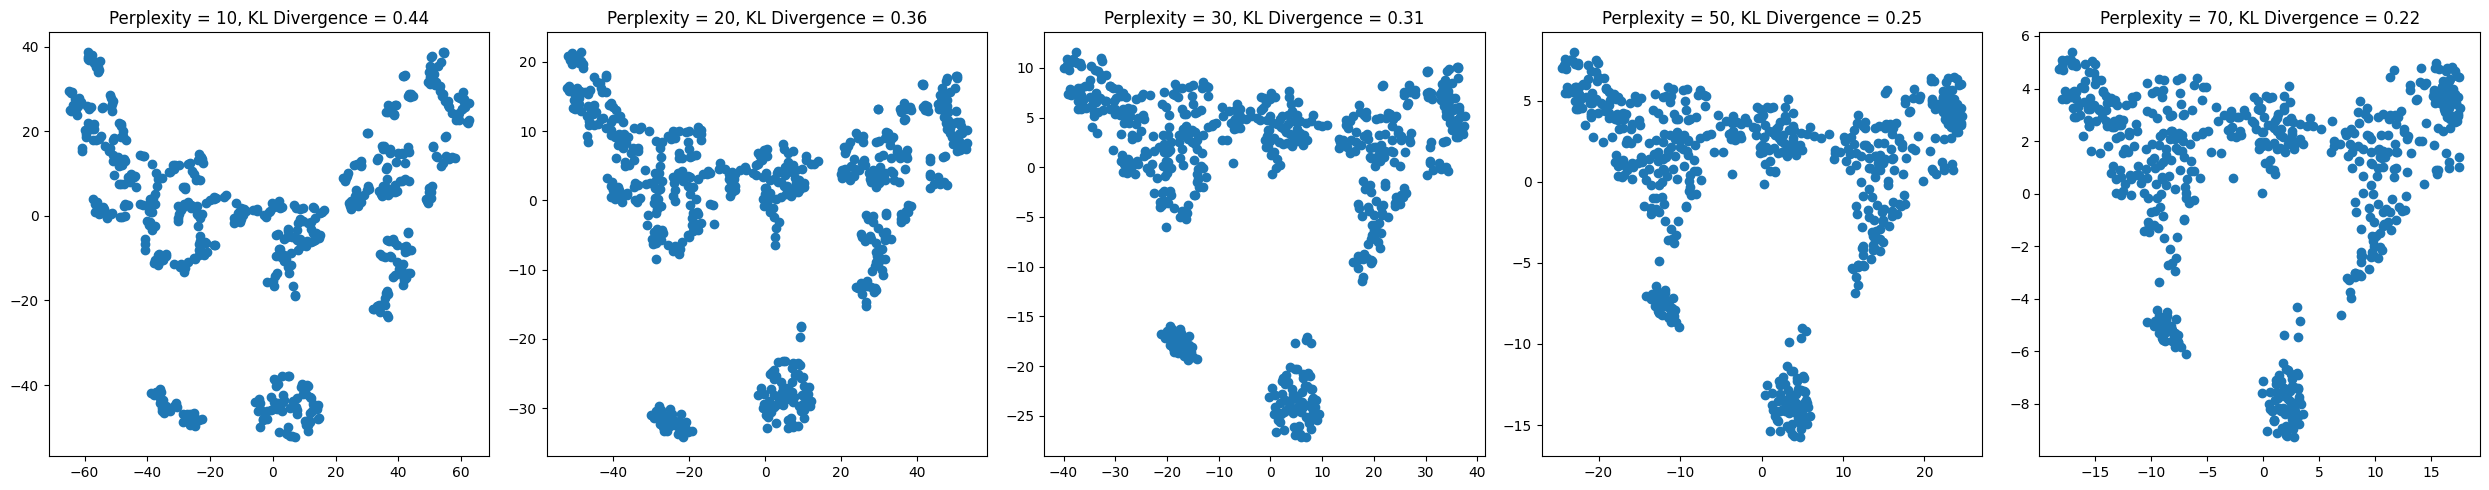

In [4]:
# List to store transformed data and KL divergence for each perplexity value
transformed_data_list = []
kl_divergence_list = []

# Perplexity values to iterate over
perplexity_values = [10, 20, 30, 50, 70]

# Create a figure for subplots
fig, axs = plt.subplots(1, len(perplexity_values), figsize=(len(perplexity_values)*5, 5))

# Loop through perplexity values
for i, perplexity in enumerate(perplexity_values):
    # Apply t-SNE with current perplexity value
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_tsne_2d = tsne.fit_transform(X)
    
    # Get the KL divergence
    kl_divergence = tsne.kl_divergence_
    
    # Store the transformed data and KL divergence
    transformed_data_list.append(X_tsne_2d)
    kl_divergence_list.append(kl_divergence)
    
    # Plot the transformed data in subplot
    axs[i].scatter(X_tsne_2d[:, 0], X_tsne_2d[:, 1])
    axs[i].set_title(f"Perplexity = {perplexity}, KL Divergence = {kl_divergence:.2f}")

plt.tight_layout()
plt.show()

Como podemos observar en el gráfico, tanto para Región como para Área, un `perplexity` de 30 nos proporciona los mejores resultados para un aposterior tarea de cclasificación, ya que agrupa mejor los datos y los aisla, en cierta medida, de los de distinta clase. Pese a que el valor de KL conyinúa disminuyendo a medida que aumentamos la `peplexity`, lo que en primera instancia nos debería indiacar que mejora la representación en el espacio de baja dimensionalidad, observamos que, para valores de 50 o 70, los grupos comienzan a ser difusos. Esto podría llegar a dificultar la posterior tarea de clustering, por ello nos quedaremos con una `perplexity` de 30.

Ahora variaremos el parámetro `n_neighbors` para verificar cuál nos da mejores resultados

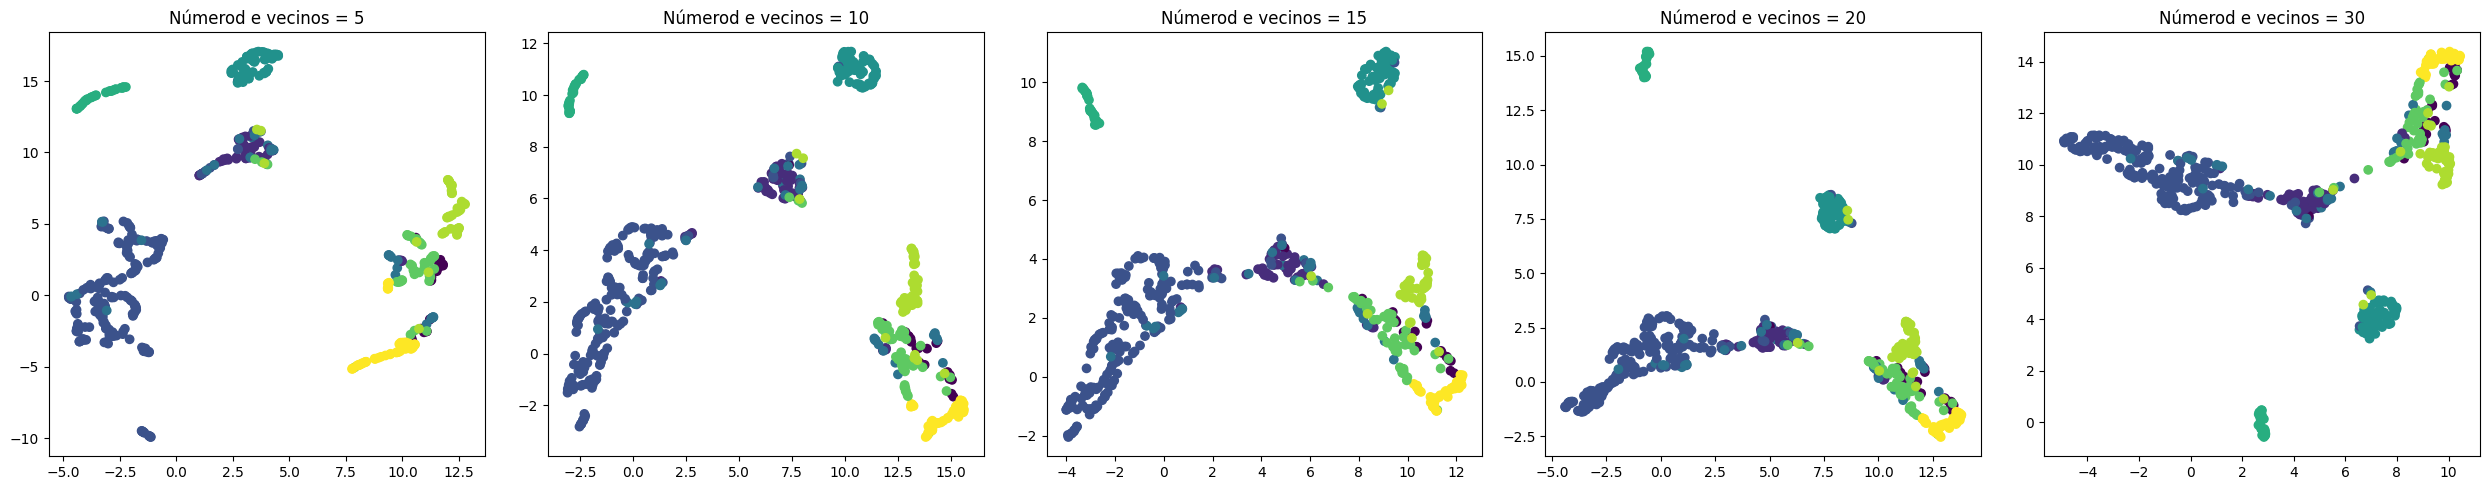

In [19]:
# List to store transformed data for each perplexity value
transformed_data_list = []

# Perplexity values to iterate over
n_neighbors_values = [5, 10, 15, 20, 30]

# Create a figure for subplots
fig, axs = plt.subplots(1, len(n_neighbors_values), figsize=(len(n_neighbors_values)*5, 5))

# Loop through perplexity values
for i, n_neighbors in enumerate(n_neighbors_values):
    # Apply t-SNE with current perplexity value
    umap = UMAP(n_components=2, n_neighbors=n_neighbors, random_state=42)
    X_umap_2d = umap.fit_transform(X)
    
    # Store the transformed data
    transformed_data_list.append(X_umap_2d)
    
    # Plot the transformed data in subplot
    axs[i].scatter(X_umap_2d[:, 0], X_umap_2d[:, 1], c = y9)
    axs[i].set_title(f"Númerod e vecinos = {n_neighbors}")

plt.tight_layout()
plt.show()

Como podemos observar en el gráfico, tanto para Región como para Área, un `n_neighbors` de 20 nos proporciona los mejores resultados para una posterior tarea de cclasificación, ya que agrupa mejor los datos y los aisla, en cierta medida, de los de distinta clase. Cabe destacar que el método de `UMAP` parece segmentar de peor forma los datos respecto al `t-SNE`.

Teniendo todo esto en cuenta, pasamos a representar los datos con los valores óptimos considerados. Mostraremos en nuestros gráficos el campo Región a través de la forma de los puntos y el campo Árera a través del color de los puntos.

In [20]:
# Aplicar t-SNE en 2D
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne_2d = tsne.fit_transform(X)

# Aplicar t-SNE en 3D
tsne_3d = TSNE(n_components=3, perplexity=30, random_state=42)
X_tsne_3d = tsne_3d.fit_transform(X)

# Aplicar UMAP en 2D (no supervisado)
umap = UMAP(n_components=2, n_neighbors=20, random_state=42)
X_umap_2d = umap.fit_transform(X)

# Aplicar UMAP en 3D (no supervisado)
umap_3d = UMAP(n_components=3, n_neighbors=20, random_state=42)
X_umap_3d = umap_3d.fit_transform(X)


In [21]:
# Convertir etiquetas a DataFrames para Plotly
df_labels3 = pd.DataFrame(data={'Region': y3})
df_labels9 = pd.DataFrame(data={'Area': y9})

# Agregar etiquetas a los resultados de UMAP
df_umap_2d = pd.DataFrame(data=X_umap_2d, columns=['UMAP-2D-X', 'UMAP-2D-Y'])
df_umap_2d = pd.concat([df_umap_2d, df_labels3, df_labels9], axis=1)

df_umap_3d = pd.DataFrame(data=X_umap_3d, columns=['UMAP-3D-X', 'UMAP-3D-Y', 'UMAP-3D-Z'])
df_umap_3d = pd.concat([df_umap_3d, df_labels3, df_labels9], axis=1)

# Visualizar en 2D
fig_2d = px.scatter(df_umap_2d, x='UMAP-2D-X', y='UMAP-2D-Y', color='Area', symbol='Region', 
                     title='UMAP en 2D')
fig_2d.update_layout(legend=dict(x=0, y=1))

fig_2d.show()

# Visualizar en 3D
fig_3d = px.scatter_3d(df_umap_3d, x='UMAP-3D-X', y='UMAP-3D-Y', z='UMAP-3D-Z', color='Area', symbol='Region',
                        title='UMAP en 3D', size_max = 1)
fig_3d.update_layout(legend=dict(x=0, y=1))

fig_3d.show()

In [22]:
# Agregar etiquetas a los resultados de t-SNE
df_tsne_2d = pd.DataFrame(data=X_tsne_2d, columns=['t-SNE-2D-X', 't-SNE-2D-Y'])
df_tsne_2d = pd.concat([df_tsne_2d, df_labels3, df_labels9], axis=1)

df_tsne_3d = pd.DataFrame(data=X_tsne_3d, columns=['t-SNE-3D-X', 't-SNE-3D-Y', 't-SNE-3D-Z'])
df_tsne_3d = pd.concat([df_tsne_3d, df_labels3, df_labels9], axis=1)

# Visualizar en 2D
fig_2d = px.scatter(df_tsne_2d, x='t-SNE-2D-X', y='t-SNE-2D-Y', color='Area', symbol='Region', 
                    title='t-SNE en 2D')
fig_2d.update_layout(legend=dict(x=0, y=1))
fig_2d.show()

# Visualizar en 3D
fig_3d = px.scatter_3d(df_tsne_3d, x='t-SNE-3D-X', y='t-SNE-3D-Y', z='t-SNE-3D-Z', color='Area', symbol='Region',
                       title='t-SNE en 3D')
fig_3d.update_layout(legend=dict(x=0, y=1))
fig_3d.show()

### 3.- Reducción de la dimensionalidad.

Realiza un estudio para averiguar la dimensionalidad intrínseca del dataset.

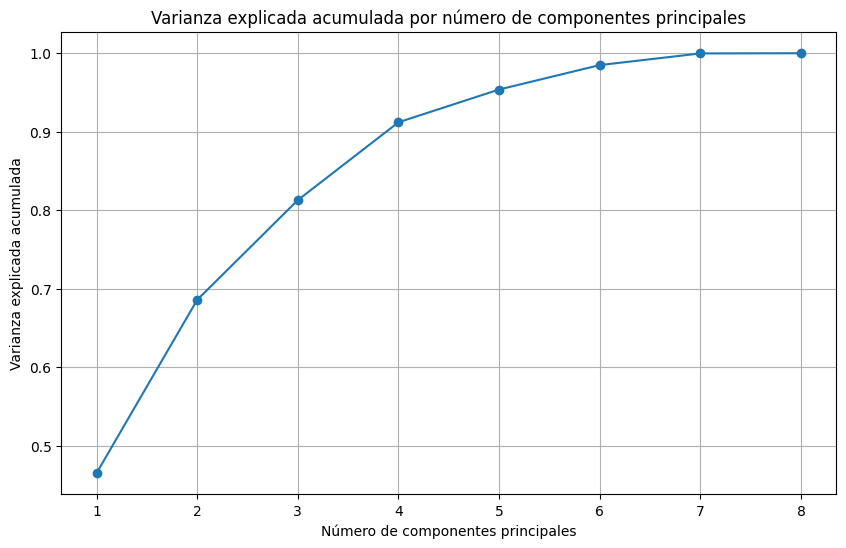

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA()
pca.fit(X_scaled)

# Obtener la varianza explicada acumulada
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)

# Graficar la varianza explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio_cumulative) + 1), explained_variance_ratio_cumulative, marker='o', linestyle='-')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.title('Varianza explicada acumulada por número de componentes principales')
plt.grid(True)
plt.show()


In [77]:
lPCA_alg = lPCA(ver='FO', alphaRatio=0.05, alphaFO=0.1, alphaFan=10, betaFan=0.8, PFan=0.95, verbose=True, fit_explained_variance=False)
intrinsic_dimensionality = lPCA_alg.fit_transform(X_scaled)

print("Dimensión intrínseca estimada por lPCA:", intrinsic_dimensionality)


Dimensión intrínseca estimada por lPCA: 4


### 4.- Reducción de la dimensionalidad y clasificación de los aceites en Regions y Areas.

- Separa el conjunto de datos en train (70%) y test (30%).
- Reduce la dimensionalidad del dataset utilizando los métodos espectrales vistos en clase. Investiga qué valor de número de vecinos es el más adecuado para el número de componentes que consideres adecuado en función del estudio de la dimensionalidad intrínseca.
- Elige el algoritmo de clasificación que consideres oportuno para resolver un problema de este tipo y aplícalo a estos datos.
- ¿Qué algoritmo de reducción de la dimensionalidad obtiene el mejor score para clasificar los datos en regiones? ¿Y en áreas? ¿Es el procedimiento más rápido en términos de tiempo de ejecución? Realiza una tabla con el rendimiento de la clasificación de cada algoritmo de reducción de dimensionaidad y el tiempo de ejecución.

Para clasificar usaremos el método de RandomForest, ya que consideramos que es el que mejor resultados puede ofrecer dadas las condiciones del problema (etiquetas discretizadas y un número considerable de reistros)

In [11]:
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.manifold import SpectralEmbedding
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Paso 1: Separar el conjunto de datos en train (70%) y test (30%)
X_train, X_test, y3_train, y3_test, y9_train, y9_test = train_test_split(X_scaled, y3, y9, test_size=0.3, random_state=42)

# Paso 2: Reducir la dimensionalidad del conjunto de datos utilizando métodos espectrales (Spectral Embedding)
spectral_embedding = SpectralEmbedding(n_components=4, n_neighbors=8, random_state=42)  # Usamos un valor por defecto para n_neighbors
X_train_spectral = spectral_embedding.fit_transform(X_train)
X_test_spectral = spectral_embedding.fit_transform(X_test)  # ¡Aquí usamos fit_transform en lugar de transform!

pca_red = PCA(n_components=4, random_state=42)
X_train_pca = pca_red.fit_transform(X_train)
X_test_pca = pca_red.transform(X_test)

kpca_red = KernelPCA(n_components=4, kernel='rbf', random_state=42)
X_train_kpca = kpca_red.fit_transform(X_train)
X_test_kpca = kpca_red.transform(X_test)

lda_red = LinearDiscriminantAnalysis()
X_train_lda = lda_red.fit_transform(X_train, y3_train)
X_test_lda = lda_red.transform(X_test)

# Paso 3: Entrenar un clasificador y evaluar su rendimiento en términos de precisión
clf = RandomForestClassifier(random_state=42)

# Spectral Embedding
# Para las etiquetas de regiones (y3)
start_time = time.time()
clf.fit(X_train_spectral, y3_train)
y3_pred = clf.predict(X_test_spectral)
accuracy_region = accuracy_score(y3_test, y3_pred)
region_time = time.time() - start_time

# Para las etiquetas de áreas (y9)
start_time = time.time()
clf.fit(X_train_spectral, y9_train)
y9_pred = clf.predict(X_test_spectral)
accuracy_area = accuracy_score(y9_test, y9_pred)
area_time = time.time() - start_time

# Paso 4: Mostrar los resultados
results_espectral = pd.DataFrame({
    'Reducción de Dimensionalidad': ['Spectral Embedding'],
    'Precisión Regiones': [accuracy_region],
    'Precisión Áreas': [accuracy_area],
    'Tiempo de Ejecución Regiones': [region_time],
    'Tiempo de Ejecución Áreas': [area_time]
})

print(results_espectral)
print('\n')

# PCA
# Para las etiquetas de regiones (y3)
start_time = time.time()
clf.fit(X_train_pca, y3_train)
y3_pred = clf.predict(X_test_pca)
accuracy_region = accuracy_score(y3_test, y3_pred)
region_time = time.time() - start_time

# Para las etiquetas de áreas (y9)
start_time = time.time()
clf.fit(X_train_pca, y9_train)
y9_pred = clf.predict(X_test_pca)
accuracy_area = accuracy_score(y9_test, y9_pred)
area_time = time.time() - start_time

# Paso 4: Mostrar los resultados
results_pca = pd.DataFrame({
    'Reducción de Dimensionalidad': ['PCA'],
    'Precisión Regiones': [accuracy_region],
    'Precisión Áreas': [accuracy_area],
    'Tiempo de Ejecución Regiones': [region_time],
    'Tiempo de Ejecución Áreas': [area_time]
})

print(results_pca)
print('\n')

# KPCA
# Para las etiquetas de regiones (y3)
start_time = time.time()
clf.fit(X_train_kpca, y3_train)
y3_pred = clf.predict(X_test_kpca)
accuracy_region = accuracy_score(y3_test, y3_pred)
region_time = time.time() - start_time

# Para las etiquetas de áreas (y9)
start_time = time.time()
clf.fit(X_train_kpca, y9_train)
y9_pred = clf.predict(X_test_kpca)
accuracy_area = accuracy_score(y9_test, y9_pred)
area_time = time.time() - start_time

# Paso 4: Mostrar los resultados
results_kpca = pd.DataFrame({
    'Reducción de Dimensionalidad': ['KPCA'],
    'Precisión Regiones': [accuracy_region],
    'Precisión Áreas': [accuracy_area],
    'Tiempo de Ejecución Regiones': [region_time],
    'Tiempo de Ejecución Áreas': [area_time]
})

print(results_kpca)
print('\n')

# LDA
# Para las etiquetas de regiones (y3)
start_time = time.time()
clf.fit(X_train_lda, y3_train)
y3_pred = clf.predict(X_test_lda)
accuracy_region = accuracy_score(y3_test, y3_pred)
region_time = time.time() - start_time

# Para las etiquetas de áreas (y9)
start_time = time.time()
clf.fit(X_train_lda, y9_train)
y9_pred = clf.predict(X_test_lda)
accuracy_area = accuracy_score(y9_test, y9_pred)
area_time = time.time() - start_time

# Paso 4: Mostrar los resultados
results_lda = pd.DataFrame({
    'Reducción de Dimensionalidad': ['LDA'],
    'Precisión Regiones': [accuracy_region],
    'Precisión Áreas': [accuracy_area],
    'Tiempo de Ejecución Regiones': [region_time],
    'Tiempo de Ejecución Áreas': [area_time]
})

print(results_lda)


  Reducción de Dimensionalidad  Precisión Regiones  Precisión Áreas  \
0           Spectral Embedding            0.959302          0.47093   

   Tiempo de Ejecución Regiones  Tiempo de Ejecución Áreas  
0                      0.199897                   0.266845  


  Reducción de Dimensionalidad  Precisión Regiones  Precisión Áreas  \
0                          PCA            0.988372         0.912791   

   Tiempo de Ejecución Regiones  Tiempo de Ejecución Áreas  
0                       0.23295                   0.304462  


  Reducción de Dimensionalidad  Precisión Regiones  Precisión Áreas  \
0                         KPCA             0.97093         0.895349   

   Tiempo de Ejecución Regiones  Tiempo de Ejecución Áreas  
0                      0.240125                   0.278258  


  Reducción de Dimensionalidad  Precisión Regiones  Precisión Áreas  \
0                          LDA            0.994186         0.604651   

   Tiempo de Ejecución Regiones  Tiempo de Ejecución Áre

Como podemos observar, para la clasíficación de Regiones, el método con una mayor precisión es el `LDA`. En el caso de las Áreas, el método que nos ofrece una mayor precisión es la `PCA`.

En lo relativo al tiempo de ejecución, observamos que el `Spectral Embedding` es el método más rápido, aunque falla en gran medida clasificando Áreas, por lo que podríamos achacar su rápidez a esto. De los vistos en clase, el que permite un aclasificación más rápida es el `KPCA`. Por norma general, la clasificación de Áreas es más lenta que la de Regiones, hecho que tiene sentido dado que contiene 9 etiquetas en lugar de 3. No obstante, esto no es así para el algoritmo de `LDA`, en el cual podemos ver que, pese a ser una diferencia de tiempo prácticamente nula, se clasifican más rápidamente las Áreas que las Regiones.